# 桶排序（Bucket sort）
线性排序算法，时间复杂度为O(n)，空间复杂度为O(n)。  
概念：  
1. 将数组分到有限数量的有序桶里
2. 对每个桶进行排序
3. 将所有桶合并
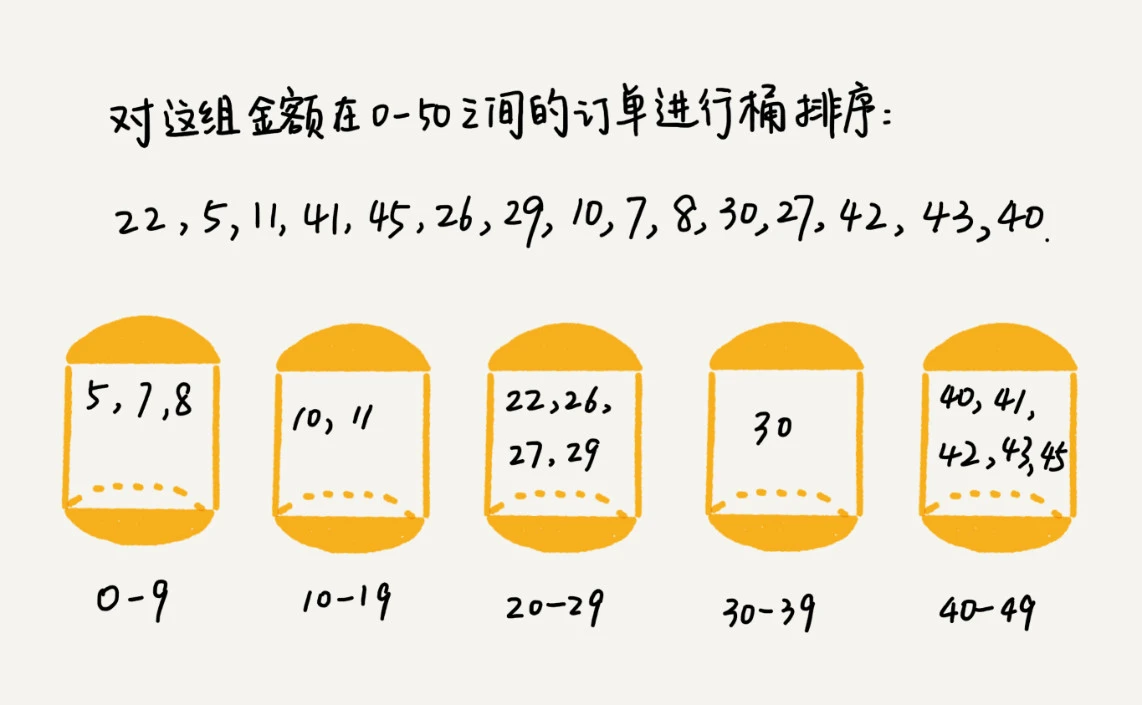

## 分析桶排序算法复杂度
1. 如果要排序的数据有 n 个，把它们均匀地划分到 m 个桶内，每个桶里就有 k=n/m 个元素。
2. 每个桶内部使用快速排序，时间复杂度为 O(k * logk)。m 个桶排序的时间复杂度就是 O(m * k * logk)，因为 k=n/m，所以整个桶排序的时间复杂度就是 O(n*log(n/m))。
3. 当桶的个数 m 接近数据个数 n 时，log(n/m) 就是一个非常小的常量，这个时候桶排序的时间复杂度接近 O(n)。

## 注意
桶排序对要排序数据的要求很苛刻：
1. 要排序数据要很容易就能划分成m个桶
2. 桶与桶之间有着天然的大小顺序
3. 数据在各个桶之间的分布是均匀的

## 桶排序适用场景
- 适用于外部排序，即数据存储在外部磁盘上，数据量大，内存有限的情况下，无法一次性载入内存，需要将数据分批载入内存进行排序。

In [1]:
def bucket_sort(input_list):
    # Find maximum value in the list and use length of the list to determine which value in the list goes into which bucket 
    max_value = max(input_list)
    size = max_value/len(input_list)

    # Create n empty buckets where n is equal to the length of the input list
    buckets_list= []
    for x in range(len(input_list)):
        buckets_list.append([]) 

    # Put list elements into different buckets based on the size
    for i in range(len(input_list)):
        j = int (input_list[i] / size)
        if j != len (input_list):
            buckets_list[j].append(input_list[i])
        else:
            buckets_list[len(input_list) - 1].append(input_list[i])

    # Sort elements within the buckets using Insertion Sort
    for z in range(len(input_list)):
        insertion_sort(buckets_list[z])
            
    # Concatenate buckets with sorted elements to get sorted array
    final_output = []
    for x in range(len (input_list)):
        final_output = final_output + buckets_list[x]
    return final_output

def insertion_sort(bucket):
    for i in range (1, len (bucket)):
        var = bucket[i]
        j = i - 1
        while (j >= 0 and var < bucket[j]):
            bucket[j + 1] = bucket[j]
            j = j - 1
        bucket[j + 1] = var

# Test the function
print(bucket_sort([4, 3, 2, 1]))

[1, 2, 3, 4]
